## Import Dependencies

In [1]:
import torch
import torchvision
import torch.optim as optim
from torch.optim.lr_scheduler import StepLR, ExponentialLR, OneCycleLR, LambdaLR, CosineAnnealingLR
import torch.nn as nn

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [2]:
!pip install albumentations==0.4.6
!pip install torchsummary

In [3]:
from google.colab import drive
drive.mount('/content/drive')

BASE_DIR='/content/drive/My Drive/session9'
%cd $BASE_DIR

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/session9


In [4]:
import data_loader as dataloader
import model as m
from model import model_summary, train, test, imshow_sample, draw_graphs

## CUDA Available?

In [5]:
SEED = 1
# CUDA?
cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)
# For reproducibility
torch.manual_seed(SEED)
if cuda:
    torch.cuda.manual_seed(SEED)

CUDA Available? True


## Data Download, Transformations & Dataset Creation

In [6]:
## Get Dataset Statistics
mean, std = dataloader.return_dataset_statistics()

## Define data transformations
train_transforms, test_transforms = dataloader.albumentation_augmentation(mean, std)

## Download & return transformed datasets
trainset, testset = dataloader.return_datasets(train_transforms, test_transforms)

## Define data loaders
trainloader, testloader = dataloader.return_dataloaders(trainset, testset, cuda)

100%|██████████| 170498071/170498071 [00:13<00:00, 12833397.15it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified
Files already downloaded and verified


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


## Visualize Data Examples

 ship  bird   cat   dog  bird truck truck plane plane  ship truck  frog  bird  bird   dog  frog  ship  deer horse truck horse horse   dog   cat   cat truck  ship plane   car truck  frog  frog


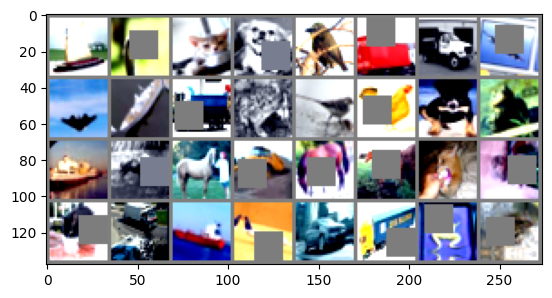

In [7]:
classes = ('plane', 'car', 'bird', 'cat','deer', 'dog', 'frog', 'horse', 'ship', 'truck')
# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)
# show images
imshow_sample(torchvision.utils.make_grid(images[0:32]))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(32)))

## Model Summary

In [8]:
device = torch.device("cuda" if cuda else "cpu")
model = m.Net(0.01).to(device)
model_summary(model, (3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 12, 30, 30]             324
              ReLU-2           [-1, 12, 30, 30]               0
       BatchNorm2d-3           [-1, 12, 30, 30]              24
           Dropout-4           [-1, 12, 30, 30]               0
            Conv2d-5           [-1, 24, 28, 28]           2,592
              ReLU-6           [-1, 24, 28, 28]               0
       BatchNorm2d-7           [-1, 24, 28, 28]              48
           Dropout-8           [-1, 24, 28, 28]               0
            Conv2d-9           [-1, 48, 14, 14]          10,368
             ReLU-10           [-1, 48, 14, 14]               0
      BatchNorm2d-11           [-1, 48, 14, 14]              96
          Dropout-12           [-1, 48, 14, 14]               0
           Conv2d-13           [-1, 48, 14, 14]          20,736
             ReLU-14           [-1, 48,

## Training & Testing

In [9]:
train_acc = []
train_losses = []
test_acc = []
test_losses = []
lrs = []
## Define Optimizer
optimizer = optim.Adam(model.parameters(), lr = 0.01, weight_decay=1e-5)
## Define Scheduler
scheduler = OneCycleLR(optimizer, max_lr = 0.015, epochs = 100, steps_per_epoch = len(trainloader))
## Define loss function
criterion = nn.CrossEntropyLoss()
## Define number of epochs and begin training
EPOCHS = 100
for epoch in range(EPOCHS):
    print("EPOCH:", epoch + 1)
    train(model, device, trainloader, train_acc, train_losses, optimizer, scheduler, criterion, lrs)
    test(model, device, testloader, test_acc, test_losses, criterion)


EPOCH: 1


Loss=1.3744633197784424 Batch_id=390 LR=0.00064 Accuracy=41.01: 100%|██████████| 391/391 [00:18<00:00, 21.05it/s]



Test set: Average loss: 0.0105, Accuracy: 5605/10000 (56.05%)

EPOCH: 2


Loss=1.3773677349090576 Batch_id=390 LR=0.00076 Accuracy=53.08: 100%|██████████| 391/391 [00:18<00:00, 21.13it/s]



Test set: Average loss: 0.0089, Accuracy: 6303/10000 (63.03%)

EPOCH: 3


Loss=1.168968915939331 Batch_id=390 LR=0.00095 Accuracy=58.01: 100%|██████████| 391/391 [00:21<00:00, 18.16it/s]



Test set: Average loss: 0.0078, Accuracy: 6724/10000 (67.24%)

EPOCH: 4


Loss=1.2057411670684814 Batch_id=390 LR=0.00122 Accuracy=61.23: 100%|██████████| 391/391 [00:18<00:00, 21.44it/s]



Test set: Average loss: 0.0074, Accuracy: 6797/10000 (67.97%)

EPOCH: 5


Loss=1.0991225242614746 Batch_id=390 LR=0.00156 Accuracy=64.01: 100%|██████████| 391/391 [00:19<00:00, 20.05it/s]



Test set: Average loss: 0.0067, Accuracy: 7160/10000 (71.60%)

EPOCH: 6


Loss=0.9846779704093933 Batch_id=390 LR=0.00198 Accuracy=65.16: 100%|██████████| 391/391 [00:18<00:00, 21.43it/s]



Test set: Average loss: 0.0063, Accuracy: 7261/10000 (72.61%)

EPOCH: 7


Loss=0.9553178548812866 Batch_id=390 LR=0.00245 Accuracy=66.83: 100%|██████████| 391/391 [00:18<00:00, 21.57it/s]



Test set: Average loss: 0.0061, Accuracy: 7398/10000 (73.98%)

EPOCH: 8


Loss=0.8938940167427063 Batch_id=390 LR=0.00298 Accuracy=67.96: 100%|██████████| 391/391 [00:19<00:00, 20.10it/s]



Test set: Average loss: 0.0060, Accuracy: 7356/10000 (73.56%)

EPOCH: 9


Loss=0.8239184617996216 Batch_id=390 LR=0.00357 Accuracy=68.80: 100%|██████████| 391/391 [00:18<00:00, 21.18it/s]



Test set: Average loss: 0.0057, Accuracy: 7560/10000 (75.60%)

EPOCH: 10


Loss=0.8377596139907837 Batch_id=390 LR=0.00420 Accuracy=69.77: 100%|██████████| 391/391 [00:18<00:00, 21.02it/s]



Test set: Average loss: 0.0055, Accuracy: 7609/10000 (76.09%)

EPOCH: 11


Loss=0.8029717206954956 Batch_id=390 LR=0.00487 Accuracy=70.20: 100%|██████████| 391/391 [00:20<00:00, 19.35it/s]



Test set: Average loss: 0.0052, Accuracy: 7765/10000 (77.65%)

EPOCH: 12


Loss=0.6789889335632324 Batch_id=390 LR=0.00558 Accuracy=70.48: 100%|██████████| 391/391 [00:18<00:00, 20.74it/s]



Test set: Average loss: 0.0055, Accuracy: 7596/10000 (75.96%)

EPOCH: 13


Loss=0.6243935227394104 Batch_id=390 LR=0.00630 Accuracy=71.40: 100%|██████████| 391/391 [00:18<00:00, 20.96it/s]



Test set: Average loss: 0.0054, Accuracy: 7640/10000 (76.40%)

EPOCH: 14


Loss=1.0140429735183716 Batch_id=390 LR=0.00705 Accuracy=71.74: 100%|██████████| 391/391 [00:19<00:00, 19.93it/s]



Test set: Average loss: 0.0049, Accuracy: 7877/10000 (78.77%)

EPOCH: 15


Loss=0.8941920399665833 Batch_id=390 LR=0.00780 Accuracy=71.78: 100%|██████████| 391/391 [00:20<00:00, 18.65it/s]



Test set: Average loss: 0.0049, Accuracy: 7885/10000 (78.85%)

EPOCH: 16


Loss=0.7666789293289185 Batch_id=390 LR=0.00855 Accuracy=72.34: 100%|██████████| 391/391 [00:18<00:00, 21.26it/s]



Test set: Average loss: 0.0051, Accuracy: 7835/10000 (78.35%)

EPOCH: 17


Loss=0.7777599096298218 Batch_id=390 LR=0.00930 Accuracy=72.62: 100%|██████████| 391/391 [00:19<00:00, 20.52it/s]



Test set: Average loss: 0.0048, Accuracy: 7937/10000 (79.37%)

EPOCH: 18


Loss=0.8779876828193665 Batch_id=390 LR=0.01003 Accuracy=73.07: 100%|██████████| 391/391 [00:18<00:00, 21.16it/s]



Test set: Average loss: 0.0052, Accuracy: 7781/10000 (77.81%)

EPOCH: 19


Loss=0.72628253698349 Batch_id=390 LR=0.01073 Accuracy=72.87: 100%|██████████| 391/391 [00:18<00:00, 21.21it/s]



Test set: Average loss: 0.0054, Accuracy: 7692/10000 (76.92%)

EPOCH: 20


Loss=0.886497974395752 Batch_id=390 LR=0.01140 Accuracy=73.56: 100%|██████████| 391/391 [00:19<00:00, 20.45it/s]



Test set: Average loss: 0.0049, Accuracy: 7871/10000 (78.71%)

EPOCH: 21


Loss=0.5047891139984131 Batch_id=390 LR=0.01203 Accuracy=73.18: 100%|██████████| 391/391 [00:18<00:00, 21.16it/s]



Test set: Average loss: 0.0047, Accuracy: 7995/10000 (79.95%)

EPOCH: 22


Loss=0.5069918036460876 Batch_id=390 LR=0.01262 Accuracy=73.80: 100%|██████████| 391/391 [00:18<00:00, 21.04it/s]



Test set: Average loss: 0.0049, Accuracy: 7902/10000 (79.02%)

EPOCH: 23


Loss=0.7437777519226074 Batch_id=390 LR=0.01315 Accuracy=73.78: 100%|██████████| 391/391 [00:18<00:00, 20.89it/s]



Test set: Average loss: 0.0048, Accuracy: 7898/10000 (78.98%)

EPOCH: 24


Loss=1.0078073740005493 Batch_id=390 LR=0.01363 Accuracy=74.01: 100%|██████████| 391/391 [00:18<00:00, 21.26it/s]



Test set: Average loss: 0.0053, Accuracy: 7839/10000 (78.39%)

EPOCH: 25


Loss=0.7945400476455688 Batch_id=390 LR=0.01404 Accuracy=73.91: 100%|██████████| 391/391 [00:18<00:00, 21.09it/s]



Test set: Average loss: 0.0047, Accuracy: 8041/10000 (80.41%)

EPOCH: 26


Loss=0.7636365294456482 Batch_id=390 LR=0.01438 Accuracy=74.40: 100%|██████████| 391/391 [00:18<00:00, 20.82it/s]



Test set: Average loss: 0.0046, Accuracy: 7991/10000 (79.91%)

EPOCH: 27


Loss=0.760004997253418 Batch_id=390 LR=0.01465 Accuracy=74.88: 100%|██████████| 391/391 [00:18<00:00, 20.86it/s]



Test set: Average loss: 0.0045, Accuracy: 8074/10000 (80.74%)

EPOCH: 28


Loss=0.6921751499176025 Batch_id=390 LR=0.01484 Accuracy=74.58: 100%|██████████| 391/391 [00:20<00:00, 19.19it/s]



Test set: Average loss: 0.0044, Accuracy: 8084/10000 (80.84%)

EPOCH: 29


Loss=0.7046023607254028 Batch_id=390 LR=0.01496 Accuracy=74.84: 100%|██████████| 391/391 [00:18<00:00, 21.28it/s]



Test set: Average loss: 0.0044, Accuracy: 8158/10000 (81.58%)

EPOCH: 30


Loss=0.9789067506790161 Batch_id=390 LR=0.01500 Accuracy=75.37: 100%|██████████| 391/391 [00:18<00:00, 21.23it/s]



Test set: Average loss: 0.0047, Accuracy: 8041/10000 (80.41%)

EPOCH: 31


Loss=0.5145834684371948 Batch_id=390 LR=0.01499 Accuracy=75.11: 100%|██████████| 391/391 [00:20<00:00, 19.49it/s]



Test set: Average loss: 0.0043, Accuracy: 8120/10000 (81.20%)

EPOCH: 32


Loss=0.6001924276351929 Batch_id=390 LR=0.01497 Accuracy=75.34: 100%|██████████| 391/391 [00:18<00:00, 21.15it/s]



Test set: Average loss: 0.0046, Accuracy: 8026/10000 (80.26%)

EPOCH: 33


Loss=0.8855843544006348 Batch_id=390 LR=0.01493 Accuracy=75.35: 100%|██████████| 391/391 [00:18<00:00, 21.20it/s]



Test set: Average loss: 0.0045, Accuracy: 8038/10000 (80.38%)

EPOCH: 34


Loss=0.5350016355514526 Batch_id=390 LR=0.01488 Accuracy=75.86: 100%|██████████| 391/391 [00:19<00:00, 19.93it/s]



Test set: Average loss: 0.0043, Accuracy: 8175/10000 (81.75%)

EPOCH: 35


Loss=0.6668866276741028 Batch_id=390 LR=0.01481 Accuracy=75.88: 100%|██████████| 391/391 [00:18<00:00, 21.24it/s]



Test set: Average loss: 0.0043, Accuracy: 8193/10000 (81.93%)

EPOCH: 36


Loss=0.8506287336349487 Batch_id=390 LR=0.01473 Accuracy=75.90: 100%|██████████| 391/391 [00:18<00:00, 21.45it/s]



Test set: Average loss: 0.0045, Accuracy: 8081/10000 (80.81%)

EPOCH: 37


Loss=0.5669852495193481 Batch_id=390 LR=0.01463 Accuracy=76.02: 100%|██████████| 391/391 [00:19<00:00, 19.98it/s]



Test set: Average loss: 0.0049, Accuracy: 7934/10000 (79.34%)

EPOCH: 38


Loss=0.7113509178161621 Batch_id=390 LR=0.01452 Accuracy=75.99: 100%|██████████| 391/391 [00:18<00:00, 21.14it/s]



Test set: Average loss: 0.0046, Accuracy: 8036/10000 (80.36%)

EPOCH: 39


Loss=0.9519588351249695 Batch_id=390 LR=0.01440 Accuracy=76.46: 100%|██████████| 391/391 [00:18<00:00, 21.10it/s]



Test set: Average loss: 0.0041, Accuracy: 8211/10000 (82.11%)

EPOCH: 40


Loss=0.6063894033432007 Batch_id=390 LR=0.01426 Accuracy=76.29: 100%|██████████| 391/391 [00:19<00:00, 19.98it/s]



Test set: Average loss: 0.0043, Accuracy: 8158/10000 (81.58%)

EPOCH: 41


Loss=0.5355512499809265 Batch_id=390 LR=0.01410 Accuracy=76.83: 100%|██████████| 391/391 [00:21<00:00, 18.55it/s]



Test set: Average loss: 0.0047, Accuracy: 8018/10000 (80.18%)

EPOCH: 42


Loss=0.7498267889022827 Batch_id=390 LR=0.01394 Accuracy=76.60: 100%|██████████| 391/391 [00:18<00:00, 20.89it/s]



Test set: Average loss: 0.0042, Accuracy: 8219/10000 (82.19%)

EPOCH: 43


Loss=0.768386721611023 Batch_id=390 LR=0.01376 Accuracy=77.01: 100%|██████████| 391/391 [00:19<00:00, 19.99it/s]



Test set: Average loss: 0.0042, Accuracy: 8228/10000 (82.28%)

EPOCH: 44


Loss=0.6584631204605103 Batch_id=390 LR=0.01357 Accuracy=76.74: 100%|██████████| 391/391 [00:18<00:00, 20.94it/s]



Test set: Average loss: 0.0039, Accuracy: 8320/10000 (83.20%)

EPOCH: 45


Loss=0.6150346994400024 Batch_id=390 LR=0.01336 Accuracy=77.18: 100%|██████████| 391/391 [00:18<00:00, 21.22it/s]



Test set: Average loss: 0.0044, Accuracy: 8102/10000 (81.02%)

EPOCH: 46


Loss=0.6785477995872498 Batch_id=390 LR=0.01315 Accuracy=77.33: 100%|██████████| 391/391 [00:19<00:00, 19.65it/s]



Test set: Average loss: 0.0042, Accuracy: 8217/10000 (82.17%)

EPOCH: 47


Loss=0.6195478439331055 Batch_id=390 LR=0.01292 Accuracy=77.09: 100%|██████████| 391/391 [00:18<00:00, 20.95it/s]



Test set: Average loss: 0.0043, Accuracy: 8203/10000 (82.03%)

EPOCH: 48


Loss=0.5941702127456665 Batch_id=390 LR=0.01268 Accuracy=77.57: 100%|██████████| 391/391 [00:18<00:00, 20.71it/s]



Test set: Average loss: 0.0039, Accuracy: 8327/10000 (83.27%)

EPOCH: 49


Loss=0.4775623679161072 Batch_id=390 LR=0.01243 Accuracy=77.73: 100%|██████████| 391/391 [00:20<00:00, 19.50it/s]



Test set: Average loss: 0.0044, Accuracy: 8063/10000 (80.63%)

EPOCH: 50


Loss=0.6723822355270386 Batch_id=390 LR=0.01218 Accuracy=77.54: 100%|██████████| 391/391 [00:18<00:00, 20.81it/s]



Test set: Average loss: 0.0039, Accuracy: 8303/10000 (83.03%)

EPOCH: 51


Loss=0.5201572179794312 Batch_id=390 LR=0.01191 Accuracy=78.46: 100%|██████████| 391/391 [00:19<00:00, 20.34it/s]



Test set: Average loss: 0.0038, Accuracy: 8417/10000 (84.17%)

EPOCH: 52


Loss=0.49793824553489685 Batch_id=390 LR=0.01163 Accuracy=78.21: 100%|██████████| 391/391 [00:18<00:00, 20.69it/s]



Test set: Average loss: 0.0037, Accuracy: 8411/10000 (84.11%)

EPOCH: 53


Loss=0.6499262452125549 Batch_id=390 LR=0.01135 Accuracy=78.38: 100%|██████████| 391/391 [00:18<00:00, 20.99it/s]



Test set: Average loss: 0.0037, Accuracy: 8411/10000 (84.11%)

EPOCH: 54


Loss=0.5625413060188293 Batch_id=390 LR=0.01105 Accuracy=78.47: 100%|██████████| 391/391 [00:19<00:00, 20.22it/s]



Test set: Average loss: 0.0038, Accuracy: 8334/10000 (83.34%)

EPOCH: 55


Loss=0.7775883674621582 Batch_id=390 LR=0.01075 Accuracy=78.48: 100%|██████████| 391/391 [00:20<00:00, 18.73it/s]



Test set: Average loss: 0.0040, Accuracy: 8281/10000 (82.81%)

EPOCH: 56


Loss=0.6162673234939575 Batch_id=390 LR=0.01045 Accuracy=78.89: 100%|██████████| 391/391 [00:18<00:00, 21.09it/s]



Test set: Average loss: 0.0040, Accuracy: 8283/10000 (82.83%)

EPOCH: 57


Loss=0.5947721600532532 Batch_id=390 LR=0.01013 Accuracy=79.14: 100%|██████████| 391/391 [00:19<00:00, 19.55it/s]



Test set: Average loss: 0.0038, Accuracy: 8354/10000 (83.54%)

EPOCH: 58


Loss=0.6572306156158447 Batch_id=390 LR=0.00982 Accuracy=79.38: 100%|██████████| 391/391 [00:18<00:00, 21.13it/s]



Test set: Average loss: 0.0036, Accuracy: 8420/10000 (84.20%)

EPOCH: 59


Loss=0.5869461297988892 Batch_id=390 LR=0.00949 Accuracy=79.38: 100%|██████████| 391/391 [00:18<00:00, 20.87it/s]



Test set: Average loss: 0.0035, Accuracy: 8496/10000 (84.96%)

EPOCH: 60


Loss=0.4622434973716736 Batch_id=390 LR=0.00917 Accuracy=79.41: 100%|██████████| 391/391 [00:20<00:00, 19.40it/s]



Test set: Average loss: 0.0036, Accuracy: 8457/10000 (84.57%)

EPOCH: 61


Loss=0.6219545602798462 Batch_id=390 LR=0.00884 Accuracy=79.87: 100%|██████████| 391/391 [00:18<00:00, 20.98it/s]



Test set: Average loss: 0.0037, Accuracy: 8420/10000 (84.20%)

EPOCH: 62


Loss=0.5298942923545837 Batch_id=390 LR=0.00851 Accuracy=79.87: 100%|██████████| 391/391 [00:18<00:00, 21.03it/s]



Test set: Average loss: 0.0034, Accuracy: 8529/10000 (85.29%)

EPOCH: 63


Loss=0.5203825235366821 Batch_id=390 LR=0.00817 Accuracy=80.08: 100%|██████████| 391/391 [00:19<00:00, 20.05it/s]



Test set: Average loss: 0.0035, Accuracy: 8526/10000 (85.26%)

EPOCH: 64


Loss=0.638306736946106 Batch_id=390 LR=0.00784 Accuracy=80.30: 100%|██████████| 391/391 [00:18<00:00, 20.96it/s]



Test set: Average loss: 0.0037, Accuracy: 8451/10000 (84.51%)

EPOCH: 65


Loss=0.5830005407333374 Batch_id=390 LR=0.00750 Accuracy=80.67: 100%|██████████| 391/391 [00:18<00:00, 20.66it/s]



Test set: Average loss: 0.0036, Accuracy: 8500/10000 (85.00%)

EPOCH: 66


Loss=0.6990874409675598 Batch_id=390 LR=0.00716 Accuracy=80.59: 100%|██████████| 391/391 [00:18<00:00, 20.96it/s]



Test set: Average loss: 0.0034, Accuracy: 8543/10000 (85.43%)

EPOCH: 67


Loss=0.5745543241500854 Batch_id=390 LR=0.00683 Accuracy=81.18: 100%|██████████| 391/391 [00:18<00:00, 21.02it/s]



Test set: Average loss: 0.0033, Accuracy: 8571/10000 (85.71%)

EPOCH: 68


Loss=0.5962910652160645 Batch_id=390 LR=0.00649 Accuracy=81.14: 100%|██████████| 391/391 [00:19<00:00, 20.34it/s]



Test set: Average loss: 0.0034, Accuracy: 8535/10000 (85.35%)

EPOCH: 69


Loss=0.8537680506706238 Batch_id=390 LR=0.00616 Accuracy=81.45: 100%|██████████| 391/391 [00:18<00:00, 20.63it/s]



Test set: Average loss: 0.0035, Accuracy: 8535/10000 (85.35%)

EPOCH: 70


Loss=0.42707014083862305 Batch_id=390 LR=0.00583 Accuracy=81.36: 100%|██████████| 391/391 [00:21<00:00, 18.52it/s]



Test set: Average loss: 0.0033, Accuracy: 8581/10000 (85.81%)

EPOCH: 71


Loss=0.6252316236495972 Batch_id=390 LR=0.00550 Accuracy=82.21: 100%|██████████| 391/391 [00:18<00:00, 21.05it/s]



Test set: Average loss: 0.0033, Accuracy: 8590/10000 (85.90%)

EPOCH: 72


Loss=0.3438589572906494 Batch_id=390 LR=0.00518 Accuracy=81.97: 100%|██████████| 391/391 [00:19<00:00, 20.19it/s]



Test set: Average loss: 0.0033, Accuracy: 8591/10000 (85.91%)

EPOCH: 73


Loss=0.48182106018066406 Batch_id=390 LR=0.00486 Accuracy=81.98: 100%|██████████| 391/391 [00:18<00:00, 20.81it/s]



Test set: Average loss: 0.0032, Accuracy: 8675/10000 (86.75%)

EPOCH: 74


Loss=0.7027402520179749 Batch_id=390 LR=0.00455 Accuracy=82.15: 100%|██████████| 391/391 [00:19<00:00, 20.20it/s]



Test set: Average loss: 0.0031, Accuracy: 8682/10000 (86.82%)

EPOCH: 75


Loss=0.42195209860801697 Batch_id=390 LR=0.00425 Accuracy=82.44: 100%|██████████| 391/391 [00:18<00:00, 20.94it/s]



Test set: Average loss: 0.0030, Accuracy: 8672/10000 (86.72%)

EPOCH: 76


Loss=0.5528973340988159 Batch_id=390 LR=0.00395 Accuracy=82.82: 100%|██████████| 391/391 [00:18<00:00, 20.65it/s]



Test set: Average loss: 0.0030, Accuracy: 8705/10000 (87.05%)

EPOCH: 77


Loss=0.4496826231479645 Batch_id=390 LR=0.00365 Accuracy=83.08: 100%|██████████| 391/391 [00:20<00:00, 19.24it/s]



Test set: Average loss: 0.0030, Accuracy: 8692/10000 (86.92%)

EPOCH: 78


Loss=0.3254430890083313 Batch_id=390 LR=0.00337 Accuracy=83.35: 100%|██████████| 391/391 [00:18<00:00, 20.83it/s]



Test set: Average loss: 0.0031, Accuracy: 8705/10000 (87.05%)

EPOCH: 79


Loss=0.23304882645606995 Batch_id=390 LR=0.00309 Accuracy=83.71: 100%|██████████| 391/391 [00:18<00:00, 21.02it/s]



Test set: Average loss: 0.0030, Accuracy: 8713/10000 (87.13%)

EPOCH: 80


Loss=0.4304707646369934 Batch_id=390 LR=0.00282 Accuracy=83.69: 100%|██████████| 391/391 [00:20<00:00, 19.27it/s]



Test set: Average loss: 0.0030, Accuracy: 8728/10000 (87.28%)

EPOCH: 81


Loss=0.3681204915046692 Batch_id=390 LR=0.00256 Accuracy=84.02: 100%|██████████| 391/391 [00:18<00:00, 21.00it/s]



Test set: Average loss: 0.0030, Accuracy: 8711/10000 (87.11%)

EPOCH: 82


Loss=0.2786746621131897 Batch_id=390 LR=0.00232 Accuracy=84.20: 100%|██████████| 391/391 [00:18<00:00, 21.09it/s]



Test set: Average loss: 0.0029, Accuracy: 8758/10000 (87.58%)

EPOCH: 83


Loss=0.48434314131736755 Batch_id=390 LR=0.00208 Accuracy=84.50: 100%|██████████| 391/391 [00:19<00:00, 19.58it/s]



Test set: Average loss: 0.0029, Accuracy: 8756/10000 (87.56%)

EPOCH: 84


Loss=0.39298215508461 Batch_id=390 LR=0.00185 Accuracy=84.61: 100%|██████████| 391/391 [00:18<00:00, 20.75it/s]



Test set: Average loss: 0.0029, Accuracy: 8730/10000 (87.30%)

EPOCH: 85


Loss=0.7082906365394592 Batch_id=390 LR=0.00164 Accuracy=84.86: 100%|██████████| 391/391 [00:21<00:00, 18.49it/s]



Test set: Average loss: 0.0029, Accuracy: 8731/10000 (87.31%)

EPOCH: 86


Loss=0.42037591338157654 Batch_id=390 LR=0.00143 Accuracy=85.13: 100%|██████████| 391/391 [00:20<00:00, 19.47it/s]



Test set: Average loss: 0.0028, Accuracy: 8790/10000 (87.90%)

EPOCH: 87


Loss=0.48787736892700195 Batch_id=390 LR=0.00124 Accuracy=85.10: 100%|██████████| 391/391 [00:18<00:00, 20.66it/s]



Test set: Average loss: 0.0028, Accuracy: 8786/10000 (87.86%)

EPOCH: 88


Loss=0.47963476181030273 Batch_id=390 LR=0.00106 Accuracy=85.32: 100%|██████████| 391/391 [00:18<00:00, 20.69it/s]



Test set: Average loss: 0.0029, Accuracy: 8797/10000 (87.97%)

EPOCH: 89


Loss=0.3593190014362335 Batch_id=390 LR=0.00090 Accuracy=85.22: 100%|██████████| 391/391 [00:19<00:00, 19.56it/s]



Test set: Average loss: 0.0029, Accuracy: 8778/10000 (87.78%)

EPOCH: 90


Loss=0.35806697607040405 Batch_id=390 LR=0.00074 Accuracy=85.72: 100%|██████████| 391/391 [00:18<00:00, 20.86it/s]



Test set: Average loss: 0.0029, Accuracy: 8778/10000 (87.78%)

EPOCH: 91


Loss=0.4694139063358307 Batch_id=390 LR=0.00060 Accuracy=85.90: 100%|██████████| 391/391 [00:18<00:00, 20.75it/s]



Test set: Average loss: 0.0029, Accuracy: 8784/10000 (87.84%)

EPOCH: 92


Loss=0.3037838041782379 Batch_id=390 LR=0.00048 Accuracy=85.93: 100%|██████████| 391/391 [00:19<00:00, 19.73it/s]



Test set: Average loss: 0.0028, Accuracy: 8800/10000 (88.00%)

EPOCH: 93


Loss=0.3757213056087494 Batch_id=390 LR=0.00037 Accuracy=85.89: 100%|██████████| 391/391 [00:18<00:00, 20.88it/s]



Test set: Average loss: 0.0029, Accuracy: 8798/10000 (87.98%)

EPOCH: 94


Loss=0.28985947370529175 Batch_id=390 LR=0.00027 Accuracy=86.18: 100%|██████████| 391/391 [00:18<00:00, 20.58it/s]



Test set: Average loss: 0.0028, Accuracy: 8797/10000 (87.97%)

EPOCH: 95


Loss=0.5082688331604004 Batch_id=390 LR=0.00019 Accuracy=86.37: 100%|██████████| 391/391 [00:19<00:00, 19.71it/s]



Test set: Average loss: 0.0028, Accuracy: 8806/10000 (88.06%)

EPOCH: 96


Loss=0.5218063592910767 Batch_id=390 LR=0.00012 Accuracy=86.26: 100%|██████████| 391/391 [00:18<00:00, 20.93it/s]



Test set: Average loss: 0.0028, Accuracy: 8790/10000 (87.90%)

EPOCH: 97


Loss=0.6160023808479309 Batch_id=390 LR=0.00007 Accuracy=86.07: 100%|██████████| 391/391 [00:18<00:00, 20.70it/s]



Test set: Average loss: 0.0029, Accuracy: 8800/10000 (88.00%)

EPOCH: 98


Loss=0.4232088029384613 Batch_id=390 LR=0.00003 Accuracy=86.14: 100%|██████████| 391/391 [00:19<00:00, 19.98it/s]



Test set: Average loss: 0.0028, Accuracy: 8807/10000 (88.07%)

EPOCH: 99


Loss=0.4823262095451355 Batch_id=390 LR=0.00001 Accuracy=86.24: 100%|██████████| 391/391 [00:18<00:00, 20.74it/s]



Test set: Average loss: 0.0028, Accuracy: 8818/10000 (88.18%)

EPOCH: 100


Loss=0.3929745852947235 Batch_id=390 LR=0.00000 Accuracy=86.47: 100%|██████████| 391/391 [00:21<00:00, 18.01it/s]



Test set: Average loss: 0.0028, Accuracy: 8803/10000 (88.03%)



## Plot Loss & Accuracy Graphs

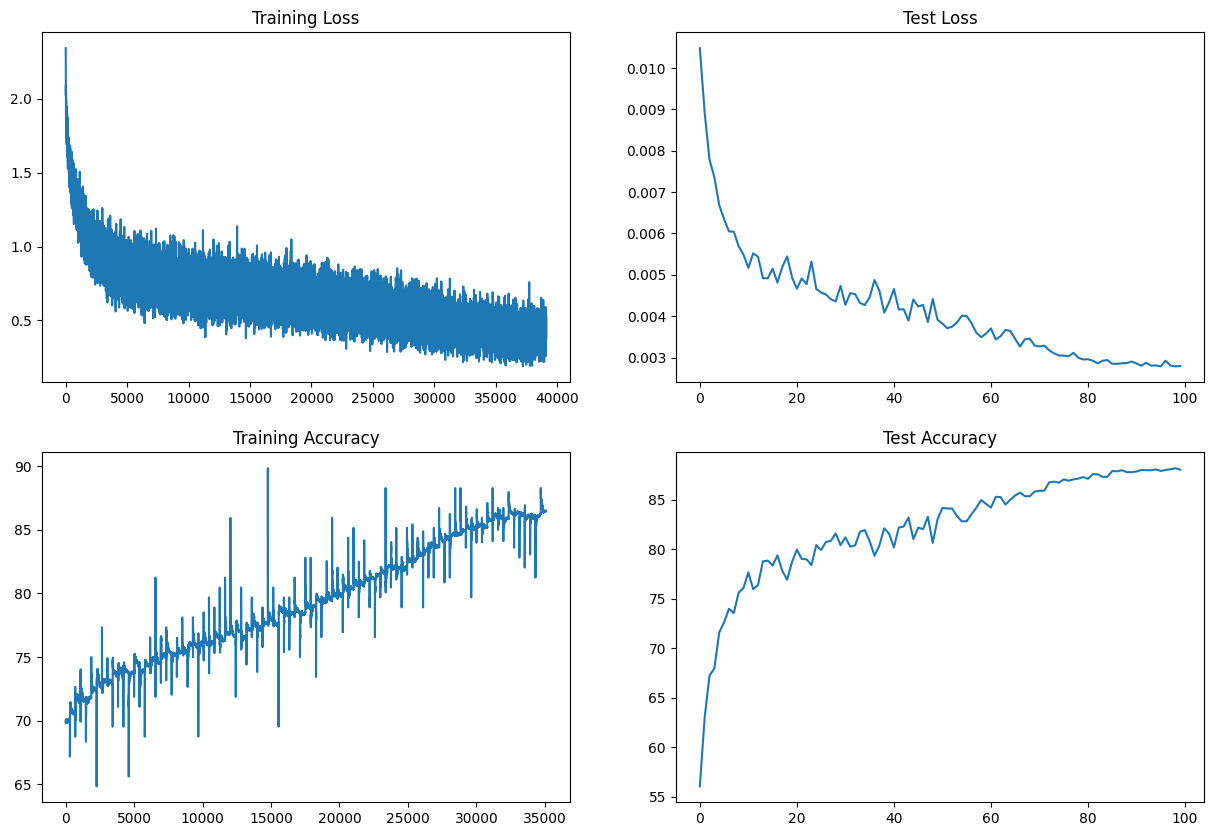

In [10]:
draw_graphs(train_losses, train_acc, test_losses, test_acc)